#Standard Settings
**Particle = $^{199}Hg$**

**Gyromagnetic ratio = $-4.84578839927 \times 10^7\,\frac{1}{T s}$**

**Mean velocity = $193\,\frac{m}{s}$**

**Magnetic field ($B_0$) = $1\,\mu T$**

**Precession time = $100\,s$**

**Chamber height = $12\,cm$**

**Chamber radius = $23.5\,cm$**

**Diffuse reflection probability = $100\%$**

**Dipole Field Strength = $1 \times 10^{-16}\,T m^{3}$ **

**Dipoles centered radially and pointing up**

**Each point represents the results of 1000 particles ran for parallel field case only**

In [1]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20

dist_range = np.concatenate([[.001], np.arange(.01, .11, .01)])
efields=srkmisc.even_sample_over_log(1e5, 1e8, 6)
legend_titles_dist=[str(x*1000)+' $mm$ from bottom' for x in dist_range[0:len(dist_range)*len(efields)]]
#legend_titles_efields=[str(t/1.e6)+' MV/m E Field ' for t in efields]
legend_titles_efields=["{:.2f}".format(t/1.e6)+' MV/m E Field ' for t in efields]

In [2]:
rid_list = range(585, 651) 
axis_range_for_stdev = [ 8e-19, 2e-13,1e-10, 1e-1]

lines_efield= [rid_list[x:x+len(dist_range)] for x in xrange(0, len(rid_list), len(dist_range))]
lines = zip(*lines_efield)

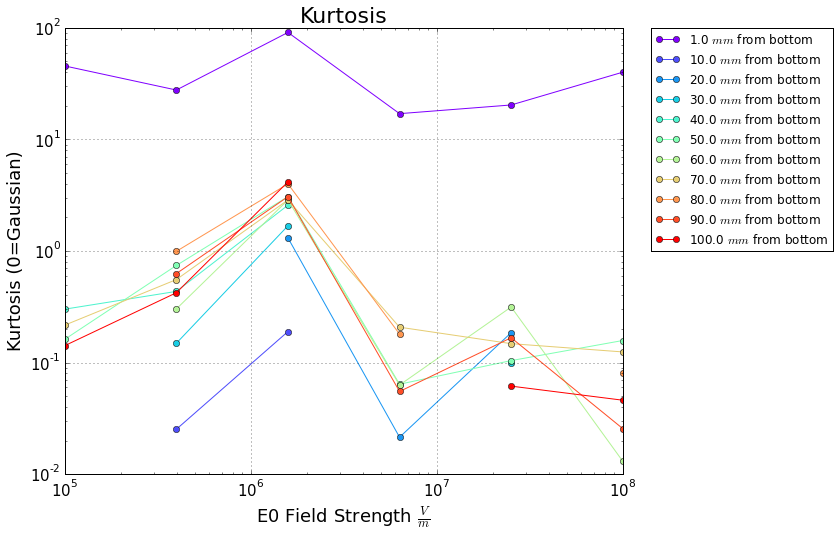

In [19]:
x,y=srkdata.get_plot_data_from_database(lines, "E0FieldStrength", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'E0 Field Strength $\frac{V}{m}$', fontsize=18)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

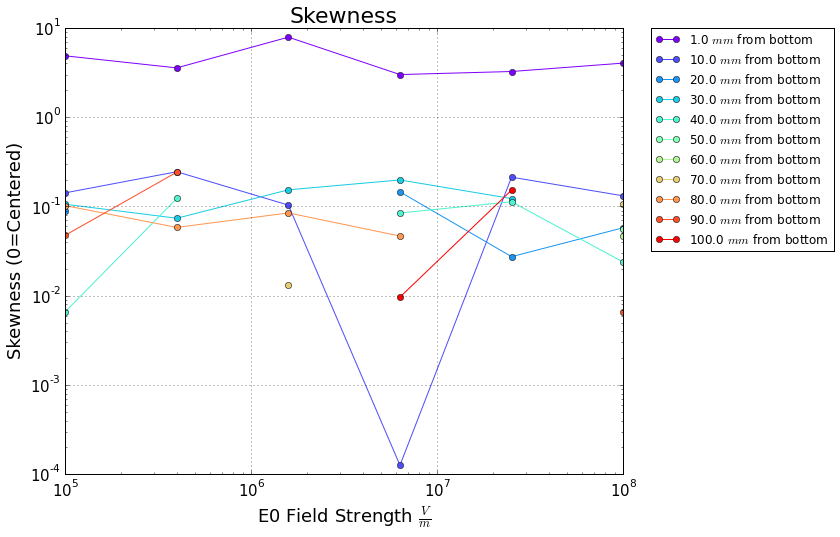

In [3]:
x,y=srkdata.get_plot_data_from_database(lines, "E0FieldStrength", "Par_PhiSkewness")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'E0 Field Strength $\frac{V}{m}$', fontsize=18)
plt.ylabel('Skewness (0=Centered)', fontsize=18)
plt.title('Skewness', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

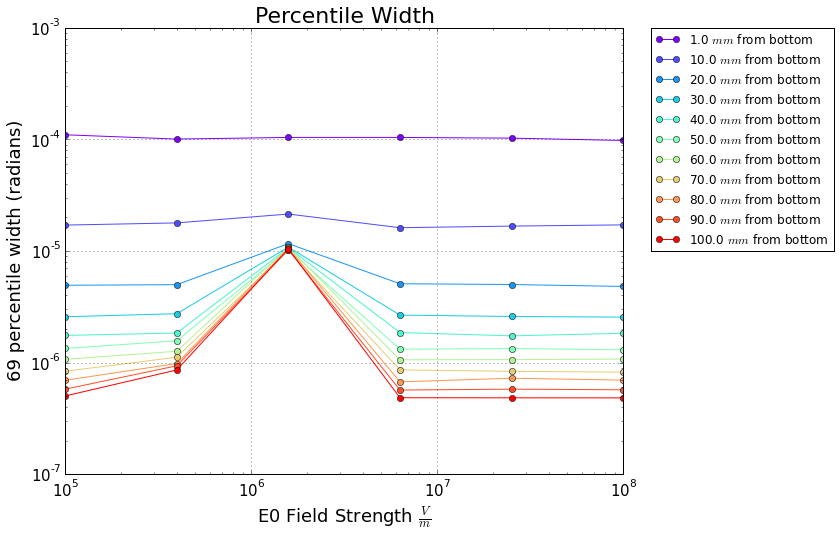

In [20]:
x,y=srkdata.get_plot_data_from_database(lines, "E0FieldStrength", "Par_PhiPercentileWidth")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))
plt.tick_params(labelsize=15)
plt.xlabel(r'E0 Field Strength $\frac{V}{m}$', fontsize=18)
plt.ylabel('69 percentile width (radians)', fontsize=18)
plt.title('Percentile Width', fontsize=22)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

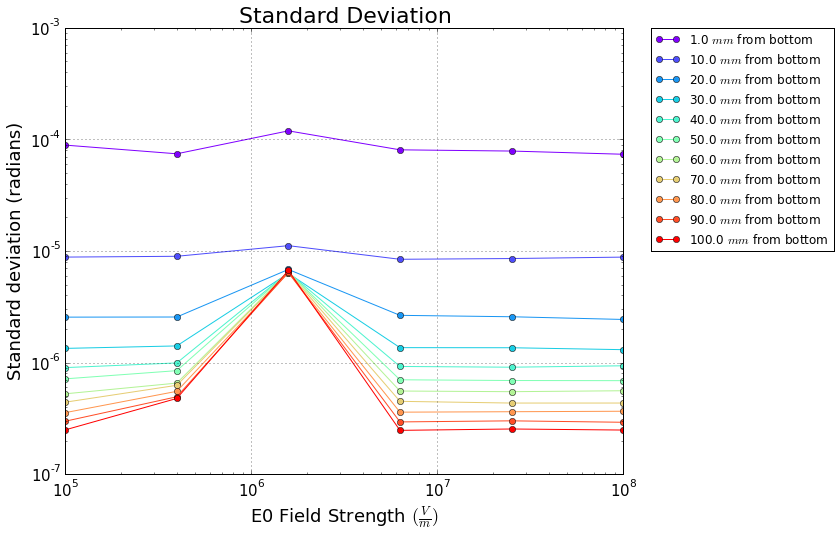

In [21]:
x,y=srkdata.get_plot_data_from_database(lines, "E0FieldStrength", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    plt.loglog(a,b,marker='o',label = legend_titles_dist[i],c=next(color))
plt.xlabel(r'E0 Field Strength $(\frac{V}{m})$', fontsize=18)
plt.ylabel('Standard deviation (radians)', fontsize=18)
plt.title('Standard Deviation', fontsize=22)
plt.tick_params(labelsize=15)
plt.grid(True)
#plt.axis(axis_range_for_stdev)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

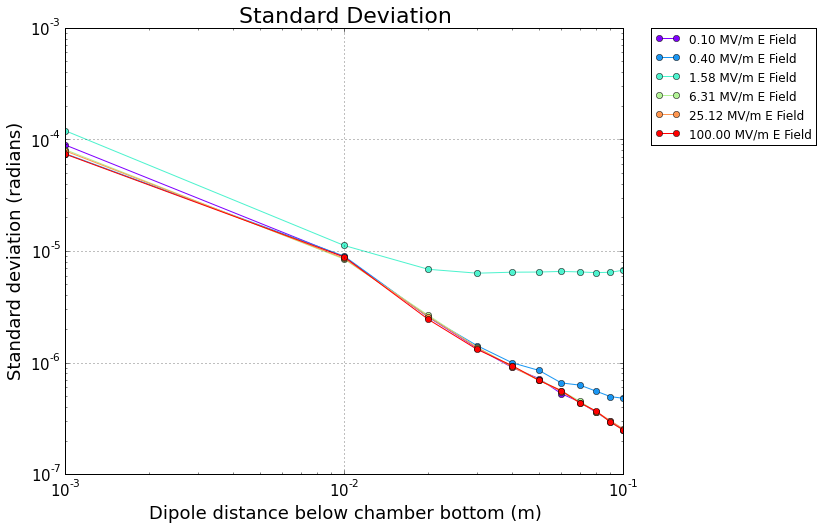

In [22]:
x,y=srkdata.get_plot_data_from_database(lines_efield, "DipolePositionBelowChamber", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines_efield))))
for i in range(len(x)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    a=list(a)
    for j in range(len(a)):
        a[j]*=-1
    plt.loglog(a,b,marker='o',label = legend_titles_efields[i],c=next(color))
plt.xlabel(r'Dipole distance below chamber bottom (m)', fontsize=18)
plt.ylabel('Standard deviation (radians)', fontsize=18)
plt.title('Standard Deviation', fontsize=22)
plt.tick_params(labelsize=15)
plt.grid(True)
#plt.axis(axis_range_for_stdev)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

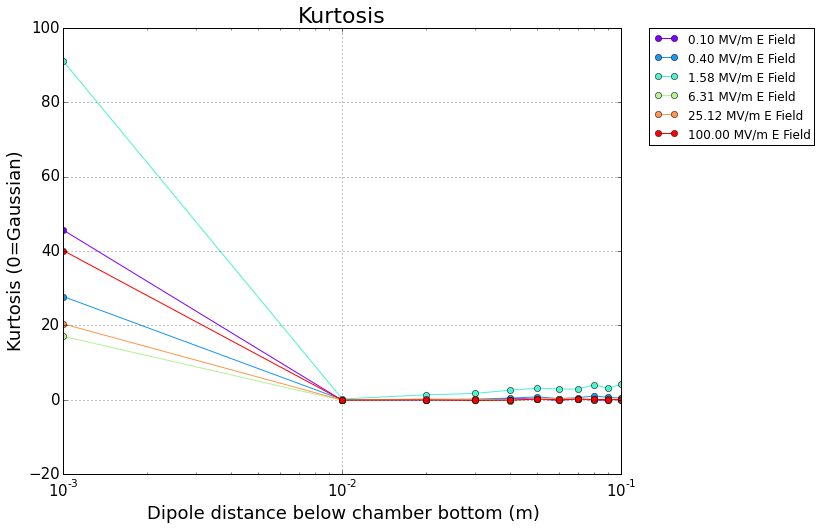

In [23]:
x,y=srkdata.get_plot_data_from_database(lines_efield, "DipolePositionBelowChamber", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines_efield))))
for i in range(len(x)):
    a,b=zip(*sorted(zip(x[i],y[i]), key=lambda x: x[0]))
    a=list(a)
    for j in range(len(a)):
        a[j]*=-1
    plt.semilogx(a,b,marker='o',label = legend_titles_efields[i],c=next(color))
plt.xlabel(r'Dipole distance below chamber bottom (m)', fontsize=18)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis', fontsize=22)
plt.tick_params(labelsize=15)
plt.grid(True)
#plt.axis(axis_range_for_stdev)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()